In [42]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dateutil import parser
import os

In [43]:
# DATA

# import

station_id=5001
file_path = os.path.join(r'D:\FMF magisterij\Matematika z računalnikom', f'ELES-MAS-{station_id}-2020-2023.csv.gz')
data = pd.read_csv(file_path, compression='gzip')
data = data[data['data_validity'] <= 32]
data.drop('measurement_location_inst_id', axis=1, inplace=True)
data['acquisition_timestamp'] = pd.to_datetime(data['acquisition_timestamp'], utc=True)

# pivoting
new_data = data.pivot_table(index='acquisition_timestamp', columns='parameter_type', values='value').reset_index()
new_data.set_index('acquisition_timestamp', inplace=True)


# ambient temperature
temperature = new_data[['AMBIENT_TEMPERATURE']]
print(temperature)

# count the NaN values
nan_count_temperature = temperature['AMBIENT_TEMPERATURE'].isna().sum()
print(nan_count_temperature)
# there are no NaN values

# check for missing measurements (skipped times)
complete_range = pd.date_range(start=temperature.index.min(), end=atemperature.index.max(), freq='5T')
missing_timestamps = complete_range.difference(temperature.index)
print(len(missing_timestamps))
#print(complete_range)
df_complete_range = pd.DataFrame(index=complete_range)
len(df_complete_range)
# we have 271508 measurements, there are 5112 missing measurment out of 276620 time steps in the whole time range

# merge all the air pressure measurements with all the time steps. missing measurment will be NaN values for now
temperature_incomplete = df_complete_range.merge(temperature, left_index=True, right_index=True, how='left')
# print(temperature_incomplete)
air_pressure_incomplete.isna().sum() # okay

# missing measurements are filled with the next available measurement
temperature_all = temperature_incomplete.bfill()
print(temperature_all)
print(atemperature_all.isna().sum()) # okay

str(temperature_all.index.dtype) # okay

parameter_type             AMBIENT_TEMPERATURE
acquisition_timestamp                         
2020-10-13 10:20:00+00:00                  7.4
2020-10-13 10:25:00+00:00                  7.5
2020-10-13 10:30:00+00:00                  7.4
2020-10-13 10:35:00+00:00                  7.5
2020-10-13 10:40:00+00:00                  7.6
...                                        ...
2023-05-31 21:35:00+00:00                 14.0
2023-05-31 21:40:00+00:00                 13.9
2023-05-31 21:45:00+00:00                 13.9
2023-05-31 21:50:00+00:00                 13.9
2023-05-31 21:55:00+00:00                 13.9

[271508 rows x 1 columns]
0


NameError: name 'atemperature' is not defined

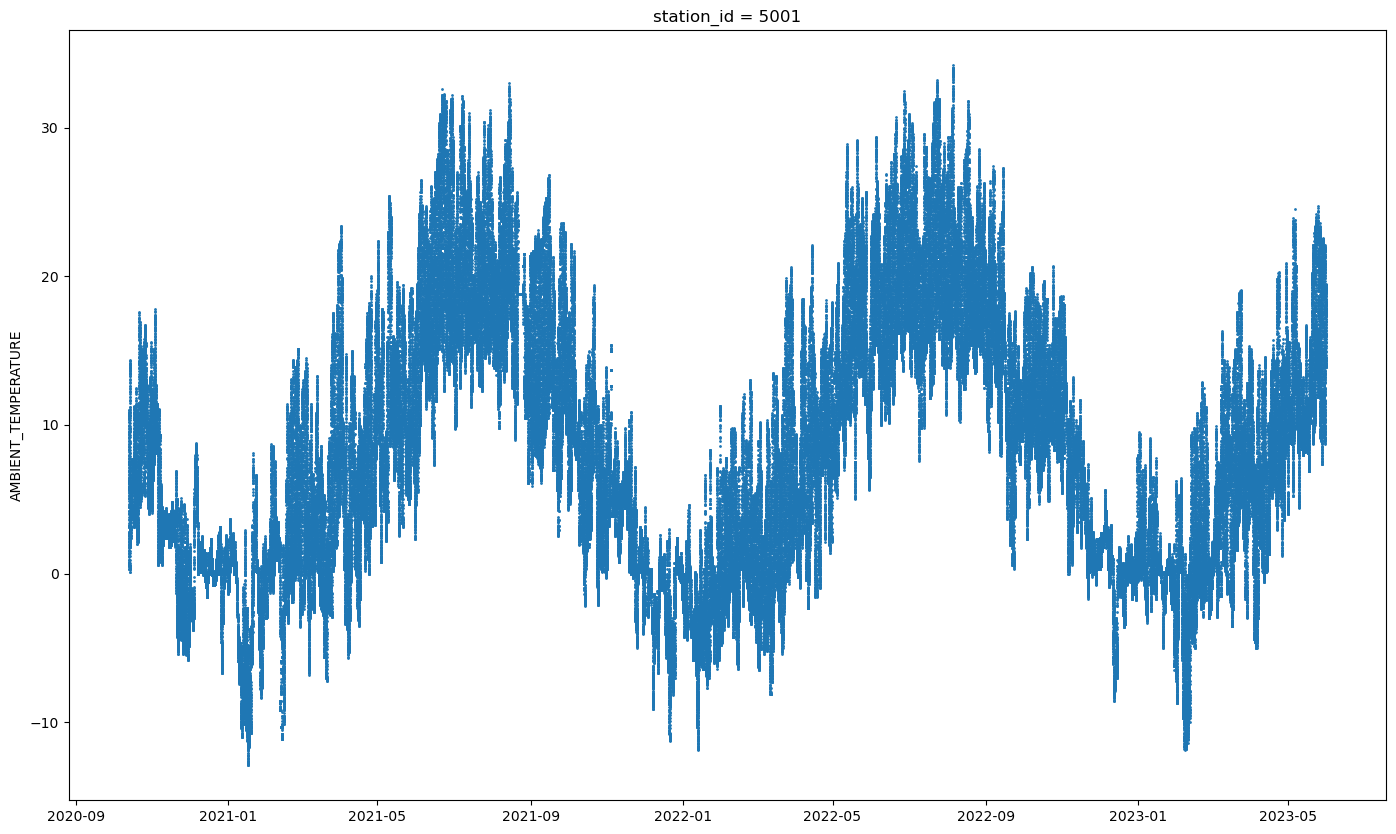

In [ ]:
# plot 'AMMBIENT_TEMPERATURE'
fig, ax = plt.subplots(figsize=(17, 10))
ax.scatter(temperature_all.index, temperature_all['AMBIENT_TEMPERATURE'],s=1)
ax.set_ylabel('AMBIENT_TEMPERATURE')  
ax.set_title(f'station_id = {station_id}')  
plt.show()

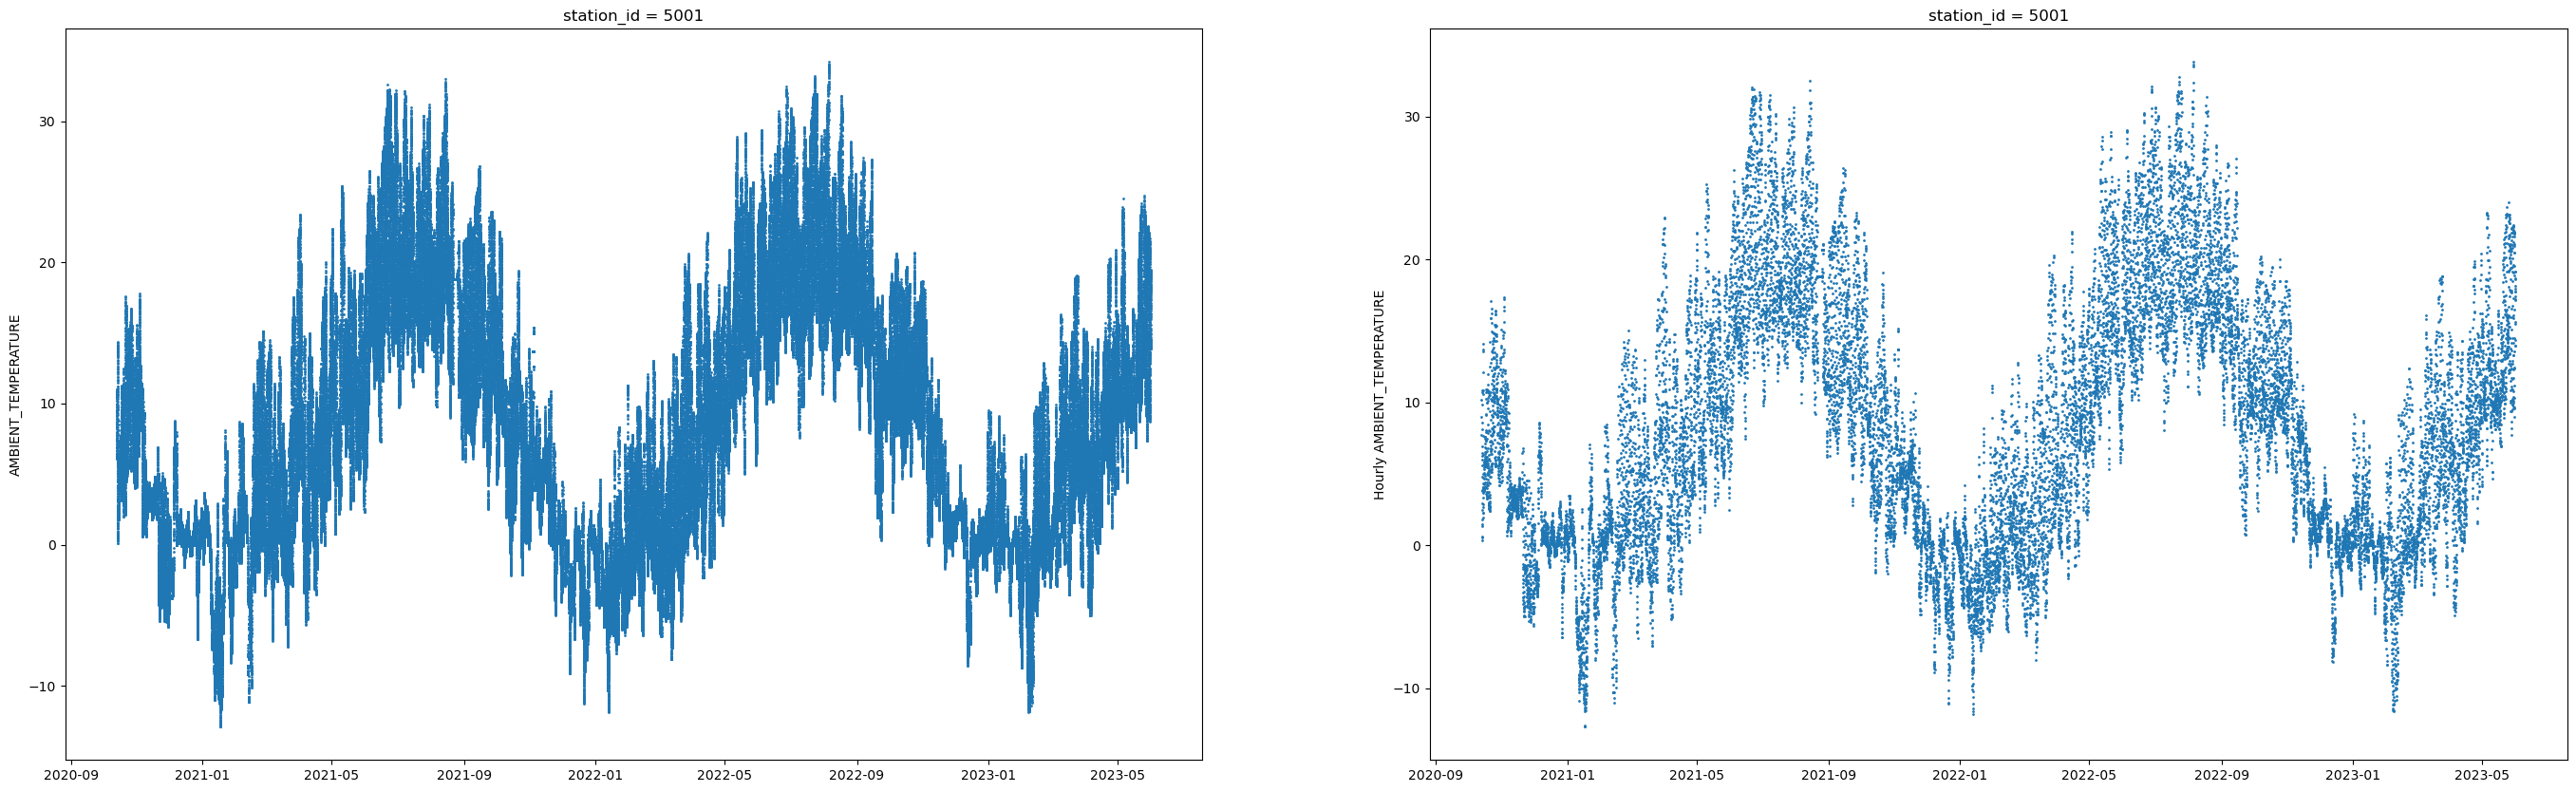

In [ ]:
# plots side by side for the report

fig, axs = plt.subplots(1, 2, figsize=(34, 10))

# Plot 'AMBIENT_TEMPERATURE'
axs[0].scatter(temperature_all.index, temperature_all['AMBIENT_TEMPERATURE'], s=1)
axs[0].set_ylabel('AMBIENT_TEMPERATURE')
axs[0].set_title(f'station_id = {station_id}')

# Plot hourly 'AMBIENT_TEMPERATURE'
axs[1].scatter(temperature_hourly.index, temperature_hourly['AMBIENT_TEMPERATURE'], s=1)
axs[1].set_ylabel('Hourly AMBIENT_TEMPERATURE')
axs[1].set_title(f'station_id = {station_id}')

plt.show()

                           AMBIENT_TEMPERATURE
2020-10-13 10:00:00+00:00             7.687500
2020-10-13 11:00:00+00:00             8.958333
2020-10-13 12:00:00+00:00            10.183333
2020-10-13 13:00:00+00:00            10.716667
2020-10-13 14:00:00+00:00            10.833333
...                                        ...
2023-05-31 17:00:00+00:00            18.708333
2023-05-31 18:00:00+00:00            17.141667
2023-05-31 19:00:00+00:00            15.525000
2023-05-31 20:00:00+00:00            14.341667
2023-05-31 21:00:00+00:00            13.983333

[23052 rows x 1 columns]


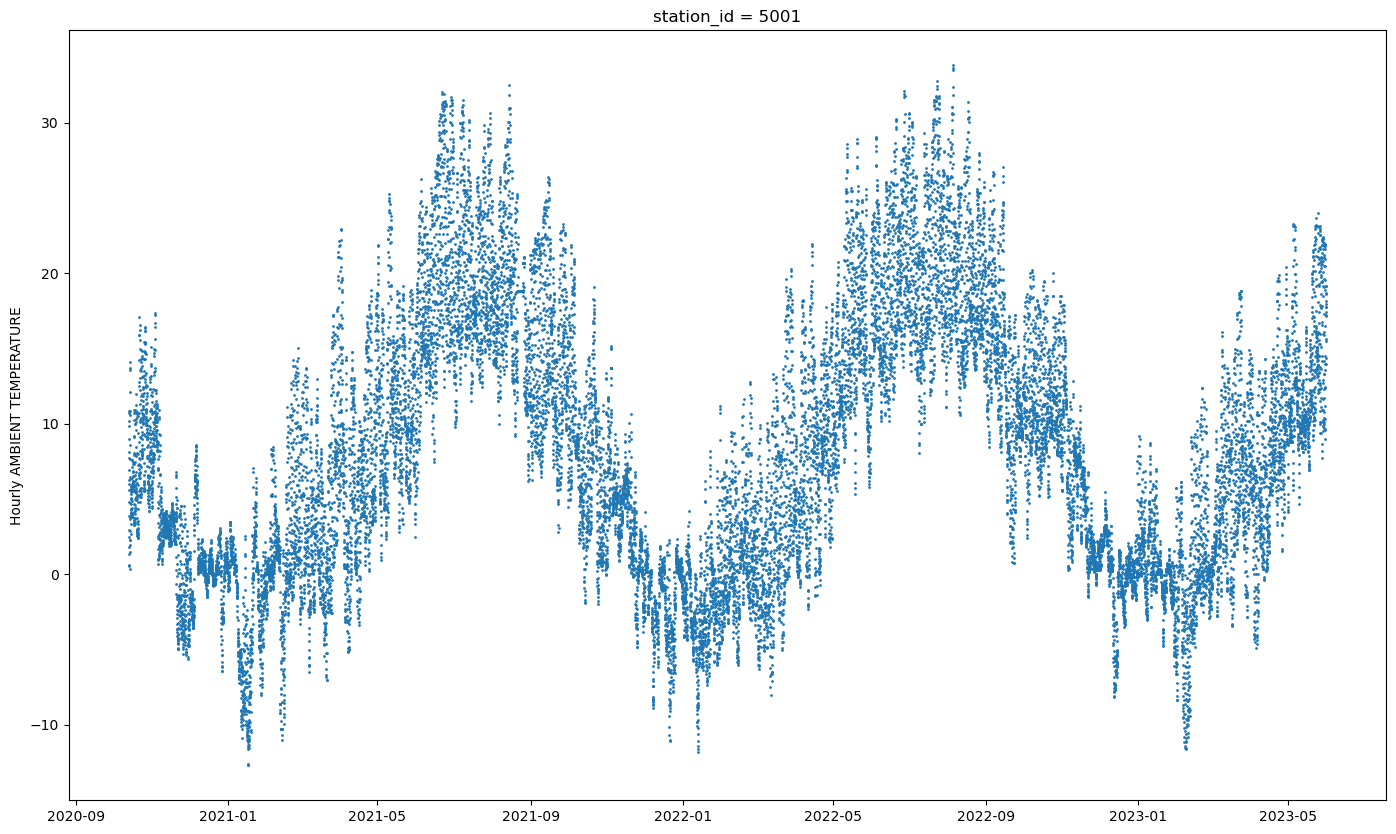

In [ ]:
# hourly data
# sum the values for each hour and take the mean

str(temperature_all.index.dtype) # okay
temperature_hourly = temperature_all.resample('H').mean()
print(temperature_hourly)

# plot hourly 'AMBIENT_TEMPERATURE'
fig, ax = plt.subplots(figsize=(17, 10))
ax.scatter(temperature_hourly.index, temperature_hourly['AMBIENT_TEMPERATURE'],s=1)
ax.set_ylabel('Hourly AMBIENT TEMPERATURE')  
ax.set_title(f'station_id = {station_id}')  
plt.show()

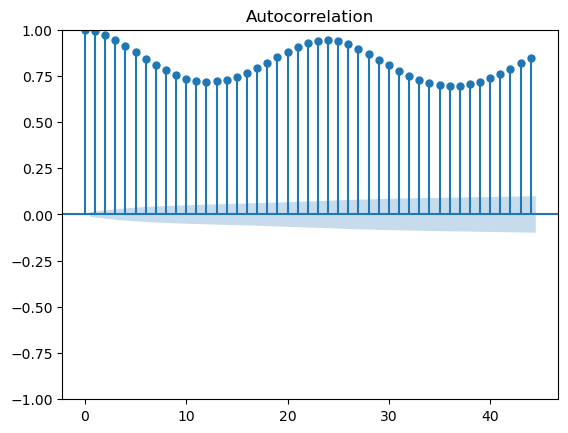

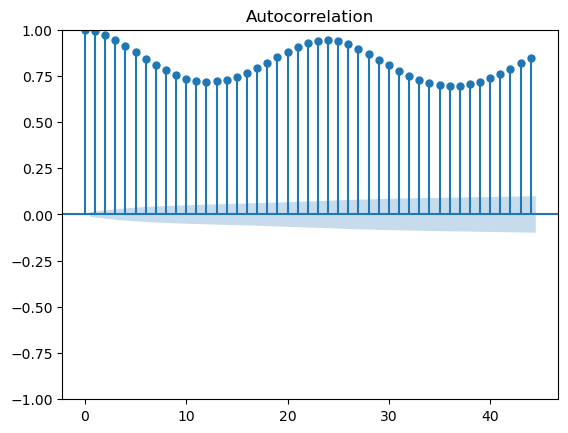

In [ ]:
# ARIMA(p, d, q)

# let's look for a suggestion for d by looking at the autocorellation function (ACF) plot

from statsmodels.graphics.tsaplots import plot_acf
plot_acf(temperature_hourly['AMBIENT_TEMPERATURE'])

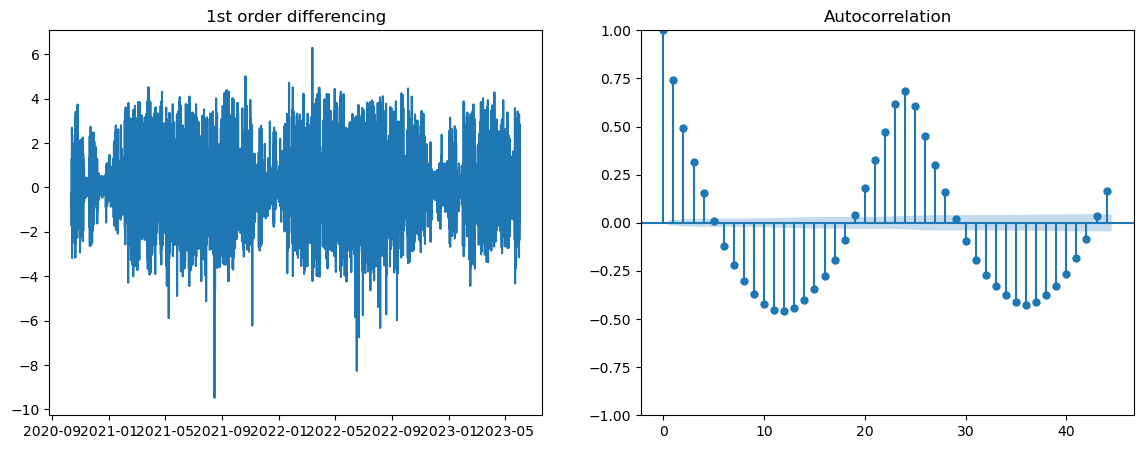

In [ ]:
# first differencing and ACF

f = plt.figure(figsize=(14, 5))
ax1 = f.add_subplot(121)
ax1.set_title('1st order differencing')
ax1.plot(temperature_hourly['AMBIENT_TEMPERATURE'].diff())

ax2 = f.add_subplot(122)
plot_acf(temperature_hourly['AMBIENT_TEMPERATURE'].diff().dropna(), ax=ax2)
plt.show()


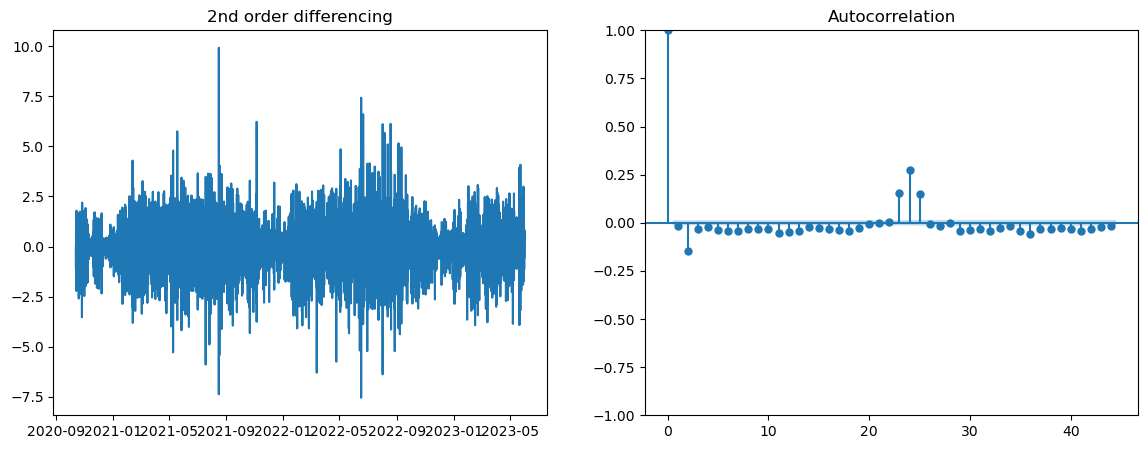

In [ ]:
# second differencing and ACF

f = plt.figure(figsize=(14, 5))
ax1 = f.add_subplot(121)
ax1.set_title('2nd order differencing')
ax1.plot(temperature_hourly['AMBIENT_TEMPERATURE'].diff().diff())

ax2 = f.add_subplot(122)
plot_acf(temperature_hourly['AMBIENT_TEMPERATURE'].diff().diff().dropna(), ax=ax2)
plt.show()

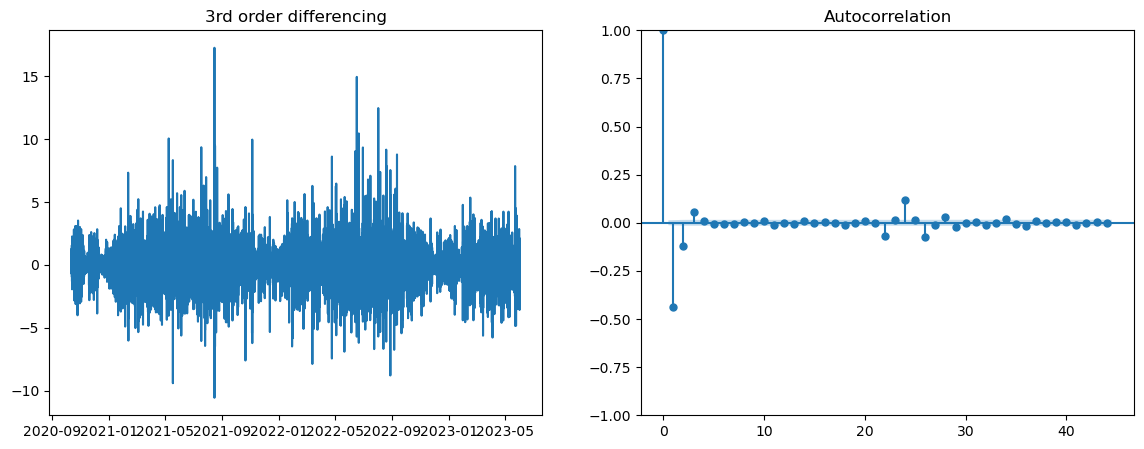

In [ ]:
# third differencing and ACF

f = plt.figure(figsize=(14, 5))
ax1 = f.add_subplot(121)
ax1.set_title('3rd order differencing')
ax1.plot(temperature_hourly['AMBIENT_TEMPERATURE'].diff().diff().diff())

ax2 = f.add_subplot(122)
plot_acf(temperature_hourly['AMBIENT_TEMPERATURE'].diff().diff().diff().dropna(), ax=ax2)
plt.show()

For deciding the appropriate order of differencind, we can to the Augmented Dickey-Fuller test. (more about it for the report is in the air_pressure files). The ADF test aims to reject the null hypothesis that the given time-series data is non-stationary. It calculates the p-value and compares it with a threshold value or significance level of 0.05. If the p-value is less than this level, then the data is stationary; else, the differencing order is incremented by one.

In [44]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(temperature_hourly['AMBIENT_TEMPERATURE'].dropna())
print('original data p-value:', result[1])

result = adfuller(temperature_hourly['AMBIENT_TEMPERATURE'].diff().dropna())
print('1-diff data p-value:', result[1])

result = adfuller(temperature_hourly['AMBIENT_TEMPERATURE'].diff().diff().dropna())
print('2-diff data p-value:', result[1])

result = adfuller(temperature_hourly['AMBIENT_TEMPERATURE'].diff().diff().diff().dropna())
print('3-diff data p-value:', result[1])

original data p-value: 0.0015578947243512005
1-diff data p-value: 0.0
2-diff data p-value: 0.0
3-diff data p-value: 0.0


The data is likely stationary.

Now we will look for the best ARIMA(p,d,q) model to fit to the data.

In [11]:
# 1ST WAY OF FINDING THE BEST FIT

# ARIMA for all the hourly ambient temperature data
from pmdarima import auto_arima
stepwise_fit = auto_arima(temperature_hourly, trace=True,
suppress_warnings=True)
# it takes around 10 min

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=50469.450, Time=13.61 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=69218.443, Time=0.43 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=50873.932, Time=0.90 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=55963.502, Time=2.79 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=69216.444, Time=0.33 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=50476.504, Time=5.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=50474.208, Time=9.22 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=30.87 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=46572.351, Time=32.16 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=50403.425, Time=6.85 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=47298.401, Time=41.00 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=45946.688, Time=34.94 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=50400.185, Time=28.10 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=46099.778, Time=39.52 sec
 ARIMA(2,1,5)(0,0,

                                SARIMAX Results                                
Dep. Variable:     AMBIENT_TEMPERATURE   No. Observations:                23052
Model:                  ARIMA(2, 1, 5)   Log Likelihood              -22822.785
Date:                 Wed, 22 May 2024   AIC                          45661.571
Time:                         10:40:56   BIC                          45725.934
Sample:                     10-13-2020   HQIC                         45682.485
                          - 05-31-2023                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.9147      0.001   1309.249      0.000       1.912       1.918
ar.L2         -0.9810      0.001   -689.201      0.000      -0.984      -0.978
ma.L1         -1.2780      0.004   -344.226 

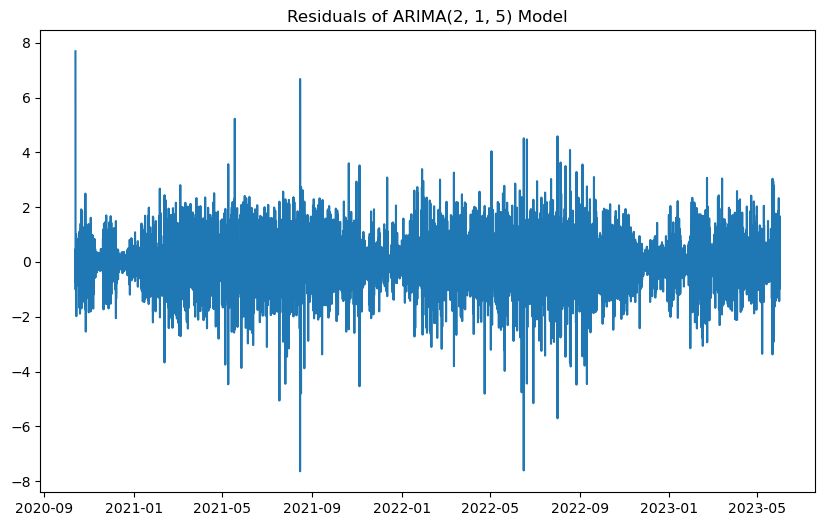

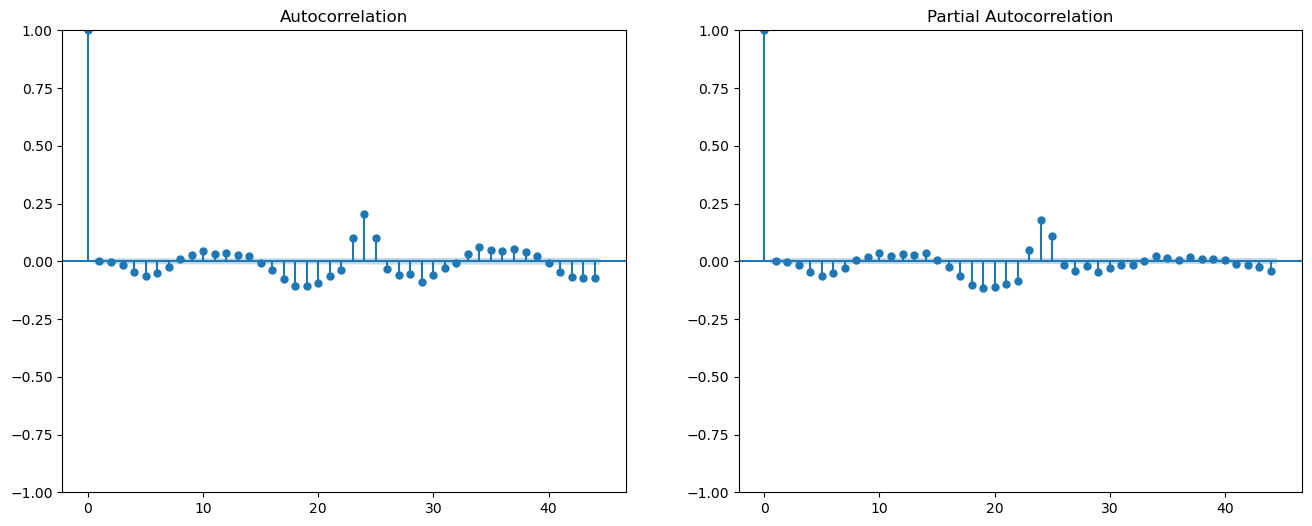

In [45]:
# fit the model 

from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

# fit the best model
best_model = ARIMA(temperature_hourly, order=(2,1,5))   # change order accordingly
best_fit = best_model.fit()

# summary of the best model
print(best_fit.summary())

# residuals of the best model
residuals_best = best_fit.resid

# plot residuals
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(residuals_best)
plt.title(f'Residuals of ARIMA{2,1,5} Model')
plt.show()

# plot ACF and PACF of the residuals
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
plot_acf(residuals_best, ax=ax[0], alpha=0.05)
plot_pacf(residuals_best, ax=ax[1], alpha=0.05)
plt.show()

In [11]:
# 2ND WAY OF FINDING THE BEST FIT

from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

# define the range for p, d, q parameters
p = range(0, 6)
d = range(0, 3)
q = range(0, 6)

# a list to store the results
results = []

# perform grid search
for i in p:
    for j in d:
        for k in q:
            order = (i, j, k)
            try:
                model = ARIMA(temperature_hourly, order=order)
                fit = model.fit()
                aic = fit.aic
                bic = fit.bic
                results.append((order, aic, bic))
            except:
                continue

# convert results to a DataFrame
results_df = pd.DataFrame(results, columns=['Order', 'AIC', 'BIC'])

# sort the results by AIC
results_df = results_df.sort_values(by='AIC')

# print the top 5 models
print(results_df.head())

# choose the best model based on the lowest AIC
best_order = results_df.iloc[0]['Order']
print(f"Best ARIMA order: {best_order}")

# fit the best model
best_model = ARIMA(temperature_hourly, order=best_order)
best_fit = best_model.fit()

# check the summary of the best model
print(best_fit.summary())

# residuals of the best model
residuals_best = best_fit.resid

# plot residuals
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(residuals_best)
plt.title(f'Residuals of ARIMA{best_order} Model')
plt.show()

# plot ACF and PACF of the residuals
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
plot_acf(residuals_best, ax=ax[0])
plot_pacf(residuals_best, ax=ax[1])
plt.show()

In [46]:
# data for 2020, 2021, 2022
# fit the best model to this data
# 2 best ARIMAs: (2,1,5) and (4,1,2) - try both
# forecast the next 24 hours 
# compare forecast from ARIMA and simple model with actual values (maybe 2 simple models)
# plot forecasts, plot errors

temperature_20_21_22 = temperature_hourly.loc[(temperature_hourly.index.year == 2020) | (temperature_hourly.index.year == 2021) | (temperature_hourly.index.year == 2022) , 'AMBIENT_TEMPERATURE']
print(temperature_20_21_22)

2020-10-13 10:00:00+00:00     7.687500
2020-10-13 11:00:00+00:00     8.958333
2020-10-13 12:00:00+00:00    10.183333
2020-10-13 13:00:00+00:00    10.716667
2020-10-13 14:00:00+00:00    10.833333
                               ...    
2022-12-31 19:00:00+00:00     2.083333
2022-12-31 20:00:00+00:00     1.658333
2022-12-31 21:00:00+00:00     0.875000
2022-12-31 22:00:00+00:00     0.950000
2022-12-31 23:00:00+00:00     0.750000
Freq: H, Name: AMBIENT_TEMPERATURE, Length: 19430, dtype: float64


Now we will create two simple models to later compare it with the ARIMA models we fitted to the data.

Simple model: Average of the previous 3 days is the value for the next day.

We fitted ARIMA models to all the hourly data. We will fit the models to the data for just 2020, 2021 and 2022 and then forecast 1 day (24 steps into the 'future', which is the start of the year 2023).

We will then compare the models with the actual data and see which model gives the best forecast. Hopefully it is the ARIMA model.

In [47]:
# 1st simple model
# average of the previous 3 days is the value for the next day

def last_3_days_average(data, forecasted_steps):
    # Forecasts the next values based on the average of the last 3 days at the same time.
    forecast = []

    for step in range(forecasted_steps):

        next_time_step = data.index[-1] + pd.Timedelta(hours=1) # finds out the next time step
        
        last_3_days = [
            next_time_step - pd.Timedelta(days=i) for i in range(1, 4)     # gets the same hour from the last 3 days
        ]
        
        values = [data[data.index == dt].values for dt in last_3_days] # extracts the values at the same hour from the last 3 days
        values = [val[0] if len(val) > 0 else np.nan for val in values]
        
        forecast_value = np.nanmean(values) # mean of the last 3 days
        
        forecast.append(forecast_value)
        
        data = pd.concat([data, pd.Series([forecast_value], index=[next_time_step])]) # adds the forecasted value to the data for the next iteration

    return pd.Series(forecast, index=[data.index[-forecasted_steps + i] for i in range(forecasted_steps)])

last_3_days_average(temperature_20_21_22, 24)

last_3_temperature = last_3_days_average(temperature_20_21_22, 24)


In [48]:
# 2nd simple model
# today's measurement is tomorrow's forecast

def today_is_tomorrow(data, forecasted_steps):

    forecast = []

    for step in range(forecasted_steps):

        next_time_step = data.index[-1] + pd.Timedelta(hours=1)
        
        same_hour_last_day = next_time_step - pd.Timedelta(days=1)
        
        forecast_value = data.loc[same_hour_last_day]
        
        forecast.append(forecast_value)
        
        data = pd.concat([data, pd.Series([forecast_value], index=[next_time_step])])

    return pd.Series(forecast, index=[data.index[-forecasted_steps + i] for i in range(forecasted_steps)])

today_is_tomorrow(temperature_20_21_22, 24)

today_is_tomorrow_temperature = today_is_tomorrow(temperature_20_21_22, 24)


In [49]:
# ARIMA(2,1,5) (1st fit)

# change p,d,q to the best found

from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")


# fit
model_215 = ARIMA(temperature_20_21_22, order=(2,1,5))
fit_215 = model_215.fit()

# summary of the fit
print(fit_215.summary())

# ARIMA forecast for 1 day (24 steps) into the future

forecast_result_215 = fit_215.get_forecast(steps=24)
forecast_values_215 = forecast_result_215.predicted_mean
conf_int_215 = forecast_result_215.conf_int()

print("Forecasted values:", forecast_values_215)
print("95% Confidence intervals of forecasts:", conf_int_215)




                                SARIMAX Results                                
Dep. Variable:     AMBIENT_TEMPERATURE   No. Observations:                19430
Model:                  ARIMA(2, 1, 5)   Log Likelihood              -19445.998
Date:                 Wed, 22 May 2024   AIC                          38907.996
Time:                         10:41:22   BIC                          38970.992
Sample:                     10-13-2020   HQIC                         38928.636
                          - 12-31-2022                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.9098      0.002   1132.916      0.000       1.906       1.913
ar.L2         -0.9754      0.002   -596.540      0.000      -0.979      -0.972
ma.L1         -1.2744      0.004   -324.030 

                                SARIMAX Results                                
Dep. Variable:     AMBIENT_TEMPERATURE   No. Observations:                19430
Model:                  ARIMA(4, 1, 2)   Log Likelihood              -19417.565
Date:                 Wed, 22 May 2024   AIC                          38849.130
Time:                         10:43:34   BIC                          38904.252
Sample:                     10-13-2020   HQIC                         38867.189
                          - 12-31-2022                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.4818      0.006    396.339      0.000       2.469       2.494
ar.L2         -2.2505      0.013   -173.782      0.000      -2.276      -2.225
ar.L3          0.9087      0.013     71.350 

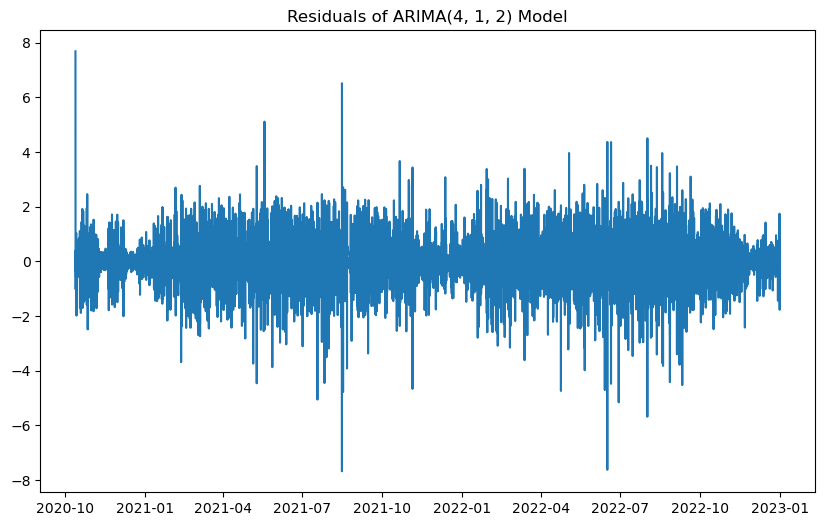

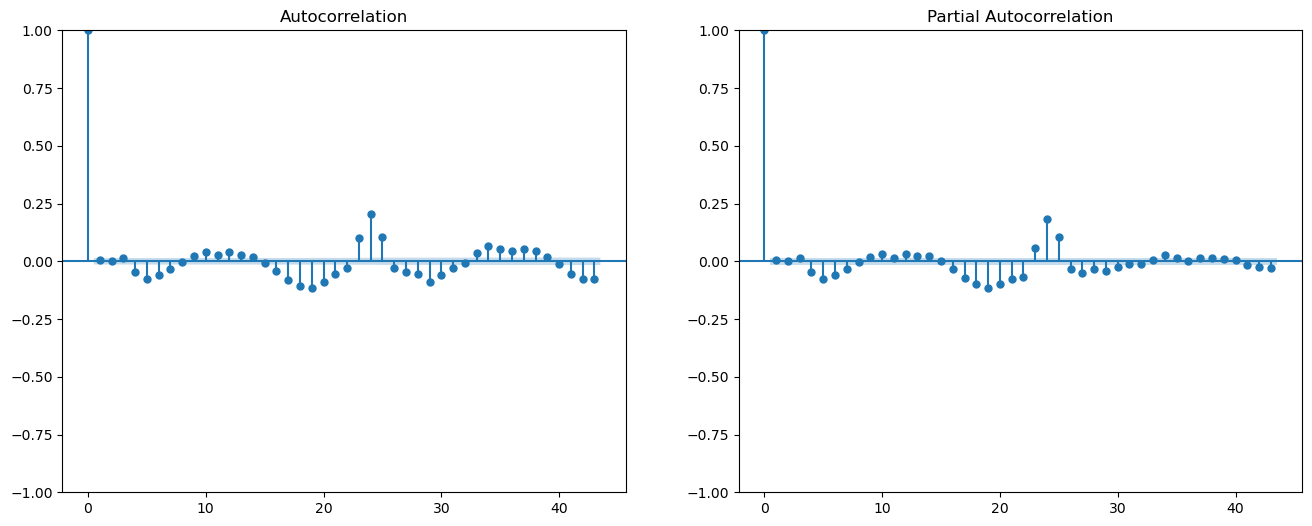

In [60]:
# ARIMA(4,1,2) (2nd fit)

# change p,d,q to the best found

from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")


# fit
model_412 = ARIMA(temperature_20_21_22, order=(4,1,2))
fit_412 = model_412.fit()

# summary of the fit
print(fit_412.summary())

# ARIMA forecast for 1 day (24 steps) into the future

forecast_result_412 = fit_412.get_forecast(steps=24)
forecast_values_412 = forecast_result_412.predicted_mean
conf_int_412 = forecast_result_412.conf_int()

print("Forecasted values:", forecast_values_412)
print("95% Confidence intervals of forecasts:", conf_int_412)

# residuals of the best model
residuals_412 = fit_412.resid

# plot residuals
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(residuals_412)
plt.title(f'Residuals of ARIMA{(4,1,2)} Model')
plt.show()

# plot ACF and PACF of the residuals
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
plot_acf(residuals_412, ax=ax[0])
plot_pacf(residuals_412, ax=ax[1])
plt.show()

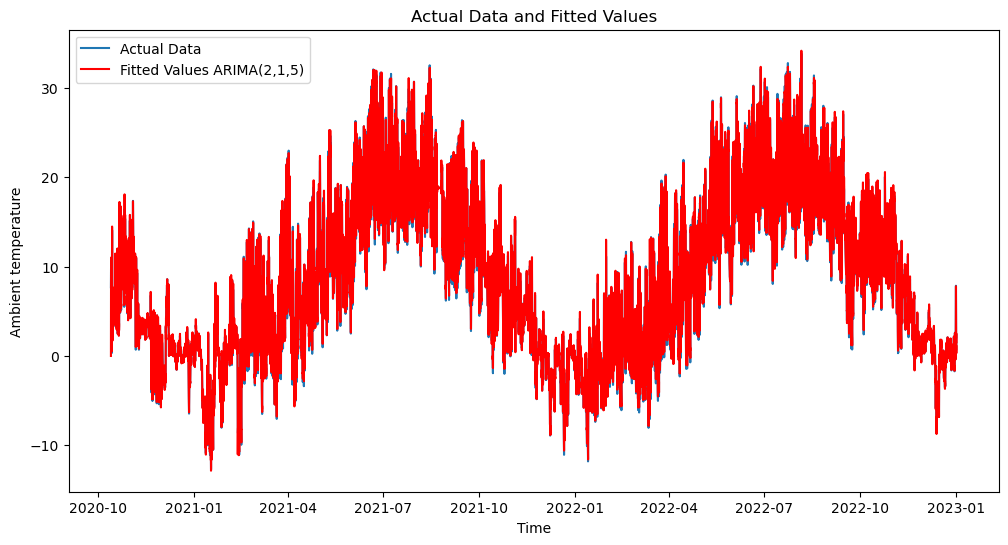

In [51]:
# plot actual data and fitted values - 1ST ARIMA
# change p,d,q to the best found

# fitted values
fitted_values_215 = fit_215.fittedvalues

plt.figure(figsize=(12,6))
plt.plot(temperature_20_21_22.index, temperature_20_21_22, label='Actual Data')
plt.plot(temperature_20_21_22.index, fitted_values_215, color='red', label='Fitted Values ARIMA(2,1,5)')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Ambient temperature')
plt.title('Actual Data and Fitted Values')
plt.show()

# this doesn't tell us much - see histogram and error evaluations

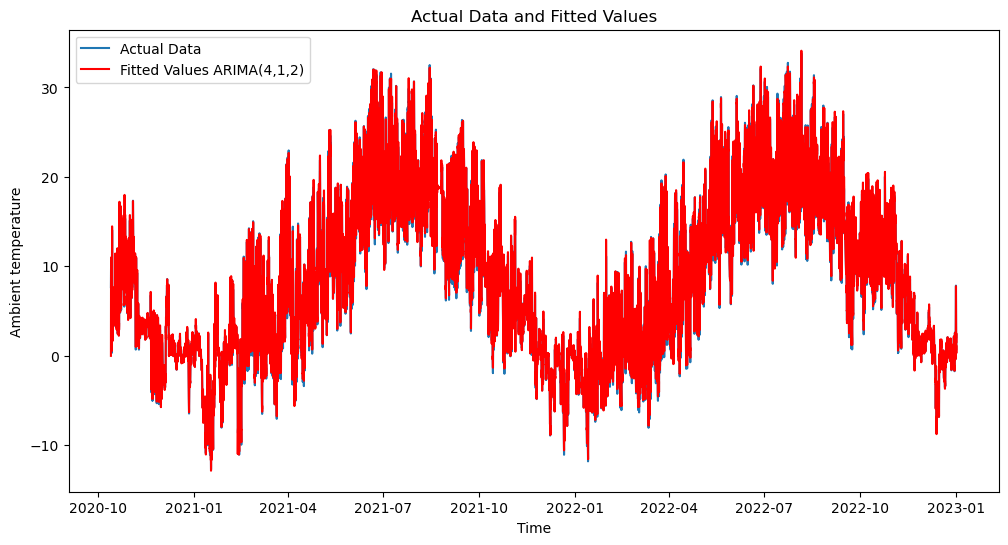

In [52]:
# plot actual data and fitted values - 2ND ARIMA
# change p,d,q to the best found

# fitted values
fitted_values_412 = fit_412.fittedvalues

plt.figure(figsize=(12,6))
plt.plot(temperature_20_21_22.index, temperature_20_21_22, label='Actual Data')
plt.plot(temperature_20_21_22.index, fitted_values_412, color='red', label='Fitted Values ARIMA(4,1,2)')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Ambient temperature')
plt.title('Actual Data and Fitted Values')
plt.show()

# this doesn't tell us much - see histogram and error evaluations

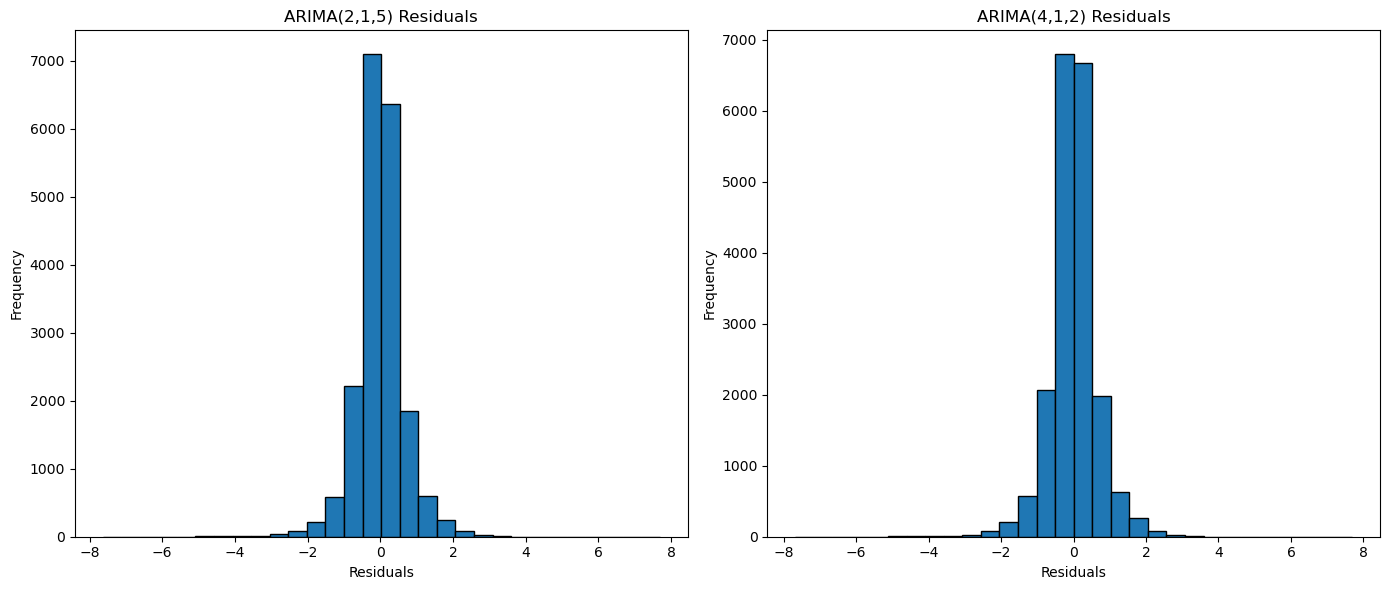

In [53]:
# comparison of the histograms

# residuals
residuals_215 = fit_215.resid
residuals_412 = fit_412.resid

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(residuals_215, bins=30, edgecolor='k')
plt.title('ARIMA(2,1,5) Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(residuals_412, bins=30, edgecolor='k')
plt.title('ARIMA(4,1,2) Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')



plt.tight_layout()
plt.show()


The residuals in a time series model are what is left over after fitting a model. The residuals are equal to the difference between the observations and the corresponding fitted values.

Residuals are useful in checking whether a model has adequately captured the information in the data. A good forecasting method will have residuals with the following properties:

1. The residuals are uncorrelated. If there are correlations between residuals, then there is information left in the residuals which should be used in computing forecasts.
2. The residuals have zero mean. If the residuals have a mean other than zero, then the forecasts are biased.

In [61]:
# statistical test and metricts to determine which model is better

import math 
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import shapiro

# mean of the residuals (should be 0)
mean1 = np.mean(residuals_215)
mean2 = np.mean(residuals_412)
print(mean1, mean2)

# AIC (already done above) - writte about AIC in the report - also see model fit output
aic1 = fit_215.aic
aic2 = fit_412.aic
#print(aic1, aic2)
# lower is better
if aic1 < aic2:
    print('ARIMA(2,1,5) is better based on AIC.')
else:
    print('ARIMA(4,1,2) is preferred based on AIC.')

# Ljung-Box test for autocorrelation - see model fit output

# BIC - see model fit output

0.00020495451176322558 0.00021167569842773194
ARIMA(4,1,2) is preferred based on AIC.


Mean Absolute Error: 0.44703701983275135
Mean Squared Error: 0.4351493713085038


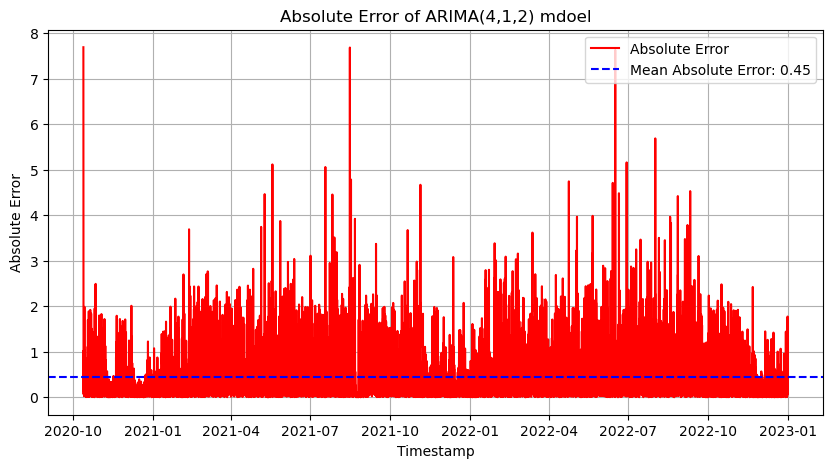

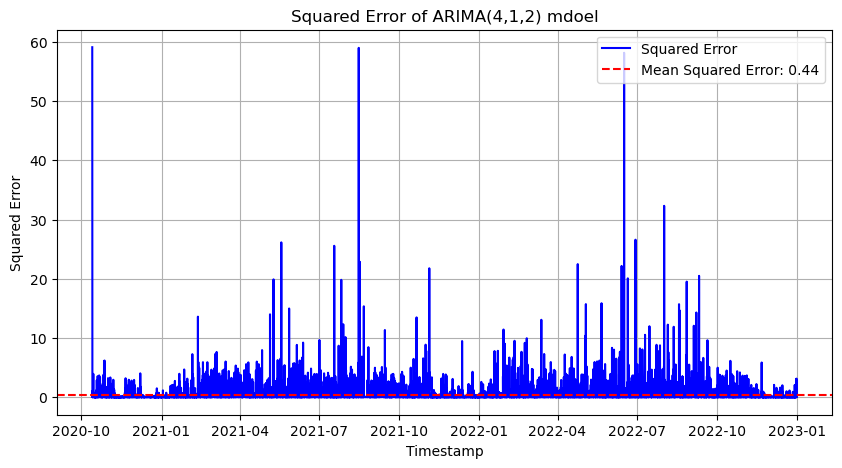

In [64]:
# absolute error comparison - actual data vs fitted model data

def calculate_errors(data, model): 
      # model are fitted values of a chosen model
  if isinstance(data, pd.Series) and isinstance(model, pd.Series):
        absolute_error = (data - model).abs()
        squared_error = (data - model) ** 2
  elif isinstance(data, np.ndarray) and isinstance(model, np.ndarray):
        absolute_error = np.abs(data - model)
        squared_error = (data - model) ** 2
  errors = pd.DataFrame({
        'absolute_error': absolute_error,
        'squared_error': squared_error
  })

  return errors

# (4,1,2) is the preferred, lets compare this data with actual data
# actual data - temperature_20_21_22
# fitted values data - fitted_values_412 

errors = calculate_errors(temperature_20_21_22, fitted_values_412 )

# mean errors
mean_absolute_error = errors['absolute_error'].mean()
mean_squared_error = errors['squared_error'].mean()
print("Mean Absolute Error:", mean_absolute_error)
print("Mean Squared Error:", mean_squared_error)

# plot of the absolute error
plt.figure(figsize=(10, 5))
plt.plot(errors['absolute_error'], label='Absolute Error', color='red')
plt.axhline(y=mean_absolute_error, color='blue', linestyle='--', label=f'Mean Absolute Error: {mean_absolute_error:.2f}')
plt.xlabel('Timestamp')
plt.ylabel('Absolute Error')
plt.title('Absolute Error of ARIMA(4,1,2) mdoel')
plt.legend()
plt.grid(True)
plt.show()

# plot of the squared error
plt.figure(figsize=(10, 5))
plt.plot(errors['squared_error'], label='Squared Error', color='blue')
plt.axhline(y=mean_squared_error, color='red', linestyle='--', label=f'Mean Squared Error: {mean_squared_error:.2f}')
plt.xlabel('Timestamp')
plt.ylabel('Squared Error')
plt.title('Squared Error of ARIMA(4,1,2) mdoel')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()
    

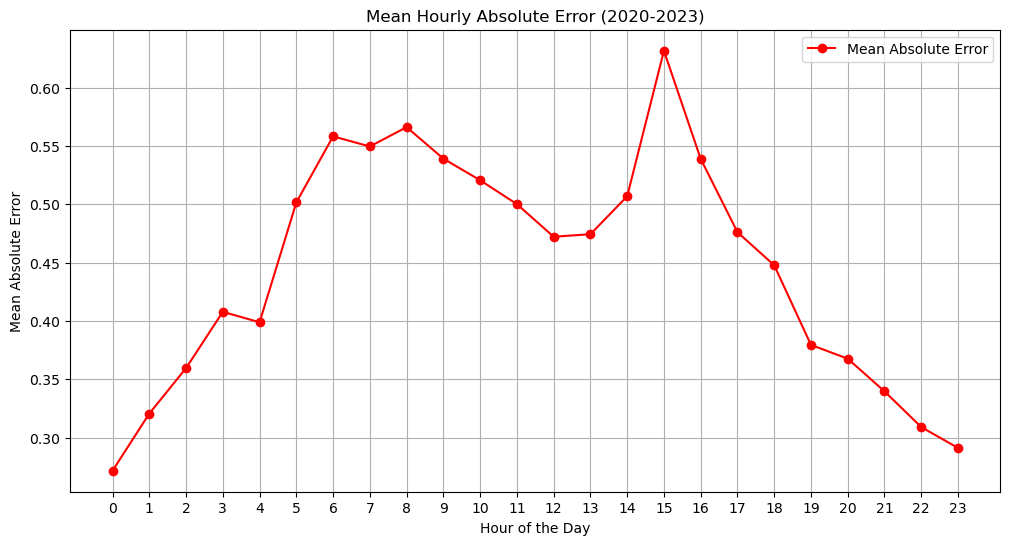

Hour
0     0.271544
1     0.320556
2     0.359552
3     0.407815
4     0.398857
5     0.501666
6     0.558298
7     0.549614
8     0.566183
9     0.539163
10    0.520648
11    0.500171
12    0.472203
13    0.474381
14    0.506872
15    0.631736
16    0.538999
17    0.476134
18    0.447742
19    0.379440
20    0.367634
21    0.339619
22    0.308983
23    0.291081
Name: absolute_error, dtype: float64


In [56]:
# mean hourly absolute errors

errors['Hour'] = errors.index.hour

# mean
mean_absolute_errors_by_hour = errors.groupby('Hour')['absolute_error'].mean()

# plot
plt.figure(figsize=(12, 6))
plt.plot(mean_absolute_errors_by_hour.index, mean_absolute_errors_by_hour, label='Mean Absolute Error', marker='o', color='red')

plt.xlabel('Hour of the Day')
plt.ylabel('Mean Absolute Error')
plt.title('Mean Hourly Absolute Error (2020-2023)')
plt.legend(loc='upper right')
plt.grid(True)
plt.xticks(range(24))
plt.show()

print(mean_absolute_errors_by_hour)

In [57]:
# actual measurements for 1 day (24 steps) into the future
temp_hourly = temperature_hourly['AMBIENT_TEMPERATURE']
actual_values_temperature_23 = temp_hourly['2023'].head(24)
print(actual_values_temperature_23)

2023-01-01 00:00:00+00:00    0.000000
2023-01-01 01:00:00+00:00   -0.116667
2023-01-01 02:00:00+00:00    0.050000
2023-01-01 03:00:00+00:00   -0.133333
2023-01-01 04:00:00+00:00   -0.208333
2023-01-01 05:00:00+00:00    0.041667
2023-01-01 06:00:00+00:00   -0.008333
2023-01-01 07:00:00+00:00    0.300000
2023-01-01 08:00:00+00:00    1.425000
2023-01-01 09:00:00+00:00    3.700000
2023-01-01 10:00:00+00:00    5.966667
2023-01-01 11:00:00+00:00    7.075000
2023-01-01 12:00:00+00:00    8.533333
2023-01-01 13:00:00+00:00    9.175000
2023-01-01 14:00:00+00:00    7.366667
2023-01-01 15:00:00+00:00    4.816667
2023-01-01 16:00:00+00:00    3.633333
2023-01-01 17:00:00+00:00    2.383333
2023-01-01 18:00:00+00:00    1.875000
2023-01-01 19:00:00+00:00    1.650000
2023-01-01 20:00:00+00:00    1.716667
2023-01-01 21:00:00+00:00    2.091667
2023-01-01 22:00:00+00:00    1.366667
2023-01-01 23:00:00+00:00    1.116667
Freq: H, Name: AMBIENT_TEMPERATURE, dtype: float64


                             Actual  ARIMA(2,1,5)  ARIMA(4,1,2)  \
2023-01-01 00:00:00+00:00  0.000000      0.602303      0.613118   
2023-01-01 01:00:00+00:00 -0.116667      0.661501      0.653261   
2023-01-01 02:00:00+00:00  0.050000      0.881737      0.865618   
2023-01-01 03:00:00+00:00 -0.133333      1.227756      1.214123   
2023-01-01 04:00:00+00:00 -0.208333      1.666166      1.662380   
2023-01-01 05:00:00+00:00  0.041667      2.165935      2.176241   
2023-01-01 06:00:00+00:00 -0.008333      2.692765      2.720963   
2023-01-01 07:00:00+00:00  0.300000      3.211430      3.260628   
2023-01-01 08:00:00+00:00  1.425000      3.688106      3.759842   
2023-01-01 09:00:00+00:00  3.700000      4.092555      4.186218   
2023-01-01 10:00:00+00:00  5.966667      4.400023      4.512673   
2023-01-01 11:00:00+00:00  7.075000      4.592727      4.719234   
2023-01-01 12:00:00+00:00  8.533333      4.660851      4.794247   
2023-01-01 13:00:00+00:00  9.175000      4.602992      4.73500

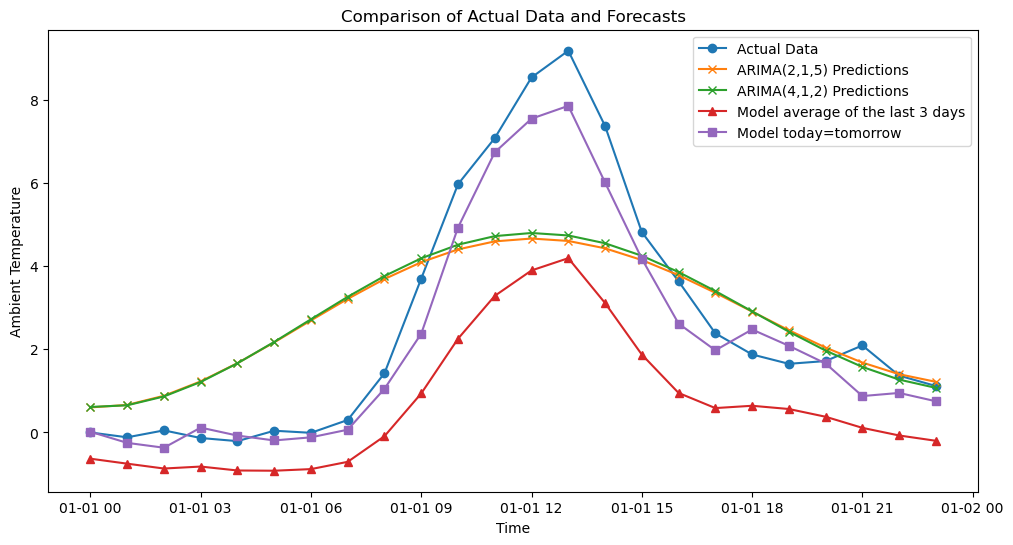

In [65]:
# comparing the models with the actual data
# change p,d,q to the best found

comparison_temperature = pd.DataFrame({
    'Actual': actual_values_temperature_23,
    'ARIMA(2,1,5)': forecast_values_215,
    'ARIMA(4,1,2)': forecast_values_412,
    'Model average of the last 3 days': last_3_temperature,
    'Model today=tomorrow': today_is_tomorrow_temperature
})

print(comparison_temperature)

plt.figure(figsize=(12,6))

plt.plot(comparison_temperature.index, comparison_temperature['Actual'], label='Actual Data', marker='o')
plt.plot(comparison_temperature.index, comparison_temperature['ARIMA(2,1,5)'], label='ARIMA(2,1,5) Predictions', marker='x')
plt.plot(comparison_temperature.index, comparison_temperature['ARIMA(4,1,2)'], label='ARIMA(4,1,2) Predictions', marker='x')
plt.plot(comparison_temperature.index, comparison_temperature['Model average of the last 3 days'], label='Model average of the last 3 days', marker='^')
plt.plot(comparison_temperature.index, comparison_temperature['Model today=tomorrow'], label='Model today=tomorrow', marker='s')

plt.xlabel('Time')
plt.ylabel('Ambient Temperature')
plt.title('Comparison of Actual Data and Forecasts')
plt.legend()
plt.show()

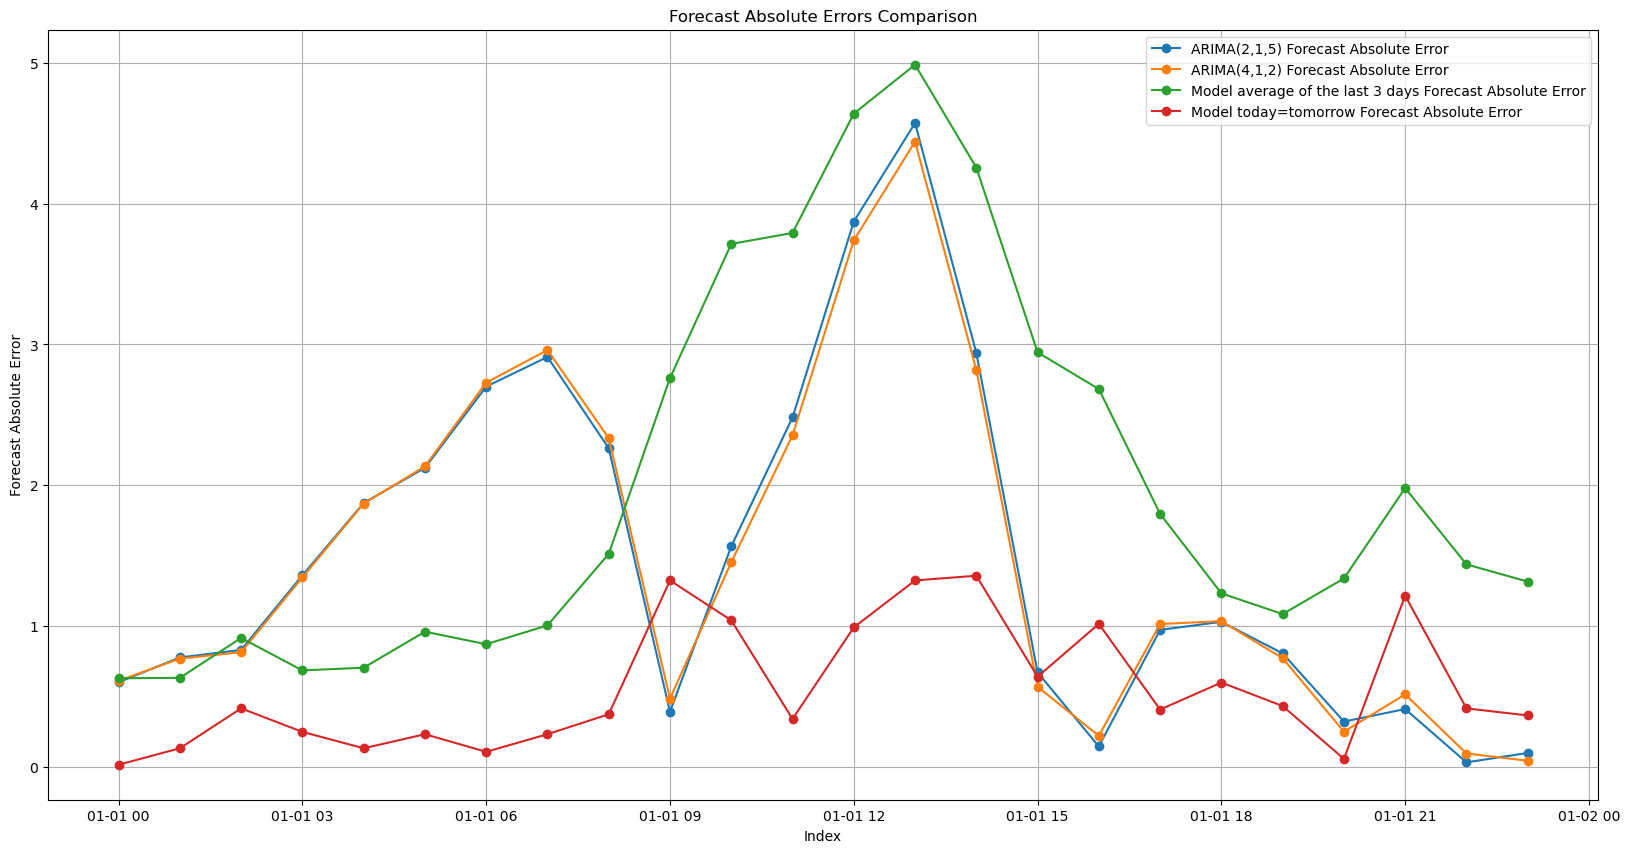

ARIMA(2,1,5) Forecast Absolute Error                        1.490556
ARIMA(4,1,2) Forecast Absolute Error                        1.474775
Model average of the last 3 days Forecast Absolute Error    1.995486
Model today=tomorrow Forecast Absolute Error                0.560069
dtype: float64


In [59]:
# 4 models' predictions compared to the actual data

# absolute errors of all the modela
forecast_absolute_errors = pd.DataFrame()
for column in comparison_temperature.columns:
    if column != 'Actual':
        forecast_absolute_errors[column + ' Forecast Absolute Error'] = (comparison_temperature['Actual'] - comparison_temperature[column]).abs()

# plot
plt.figure(figsize=(20, 10))
for column in forecast_absolute_errors.columns:
    plt.plot(forecast_absolute_errors[column], label=column, marker='o')

plt.xlabel('Index')
plt.ylabel('Forecast Absolute Error')
plt.title('Forecast Absolute Errors Comparison')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# values 
#print(forecast_absolute_errors)

# mean errors
print(forecast_absolute_errors.mean())
